## 1. Imports


In [190]:
import sys
sys.path.append('../')
from scripts.visualization_utils import impact_bar_plots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns;

In [191]:
data_path = '../results/synthetic_balTestSet/bb/'
folders= ['dt','gnb','lgr','gbt']
#folders = ['dt','gnb']

## 2. Delayed Impact plots

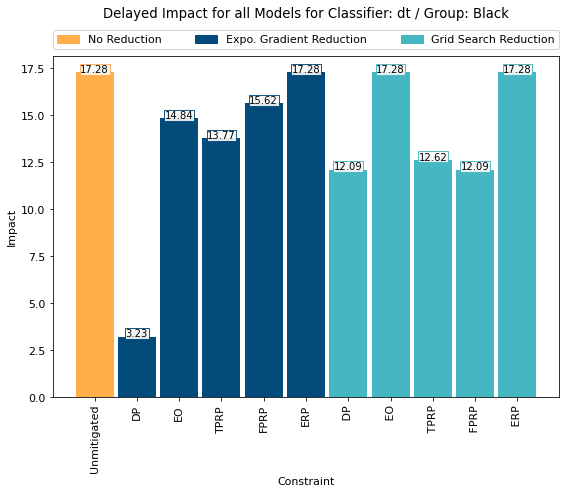

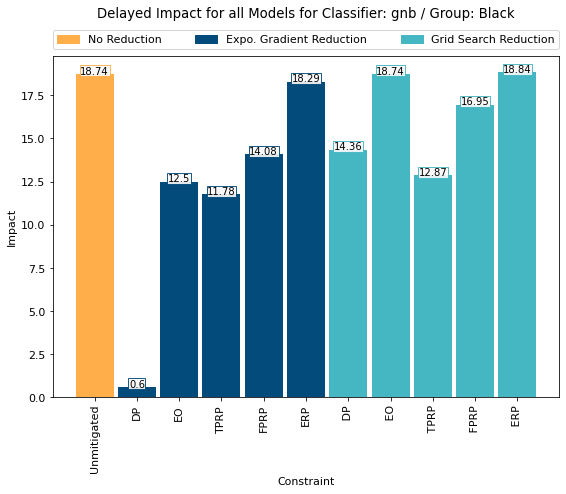

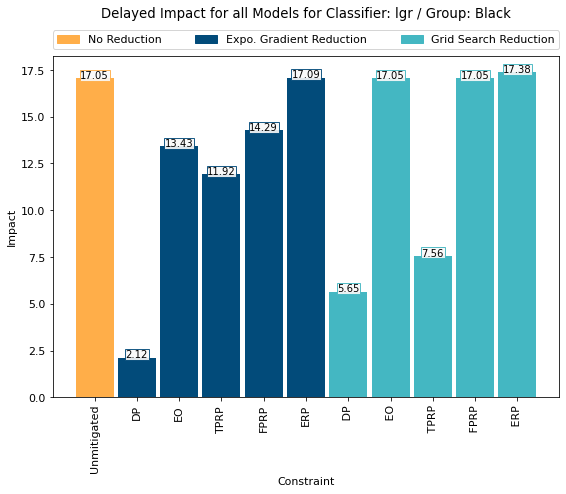

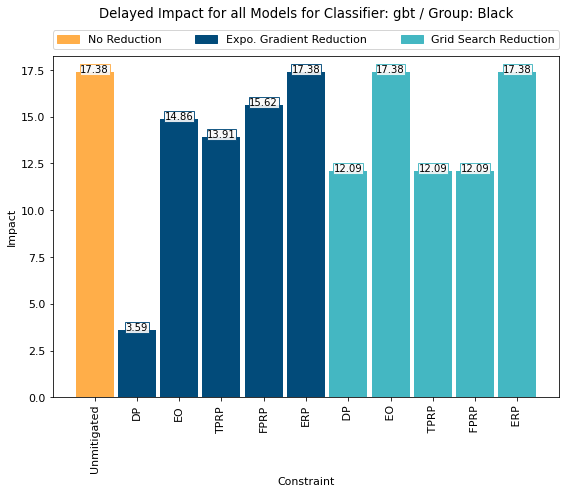

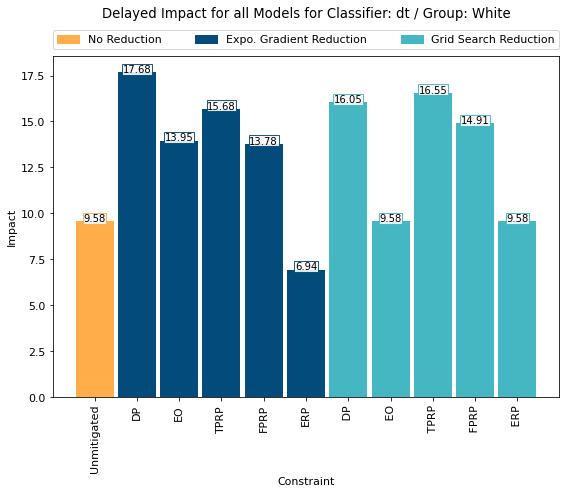

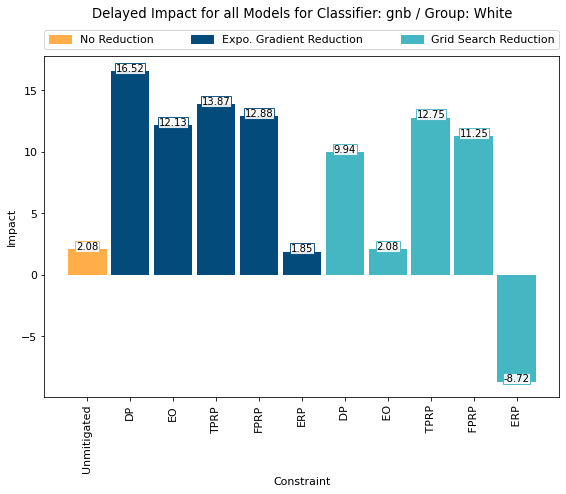

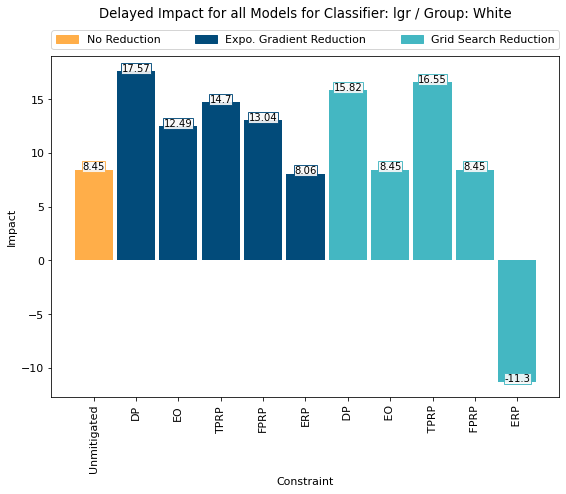

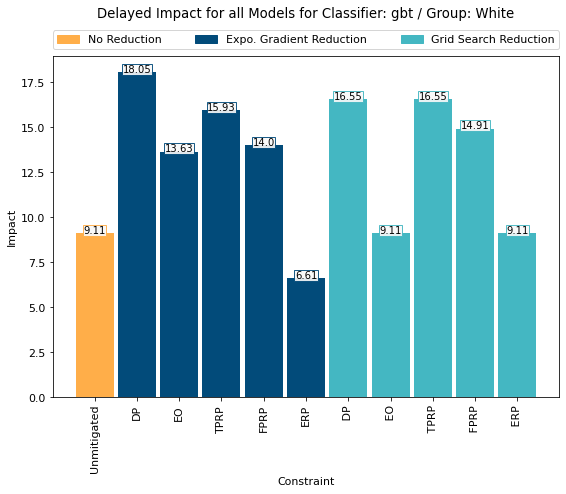

In [192]:
impact_bar_plots(data_path,'Black',folders)
impact_bar_plots(data_path,'White',folders)

## 3. Comparison of Loans Quantitys

In [193]:
# Types Dataframes
classifier_dfs = {}
dfs_b = {}
dfs_w = {}
dfs_eg = {}
dfs_gs = {}

for f in folders:
    path = f'{data_path}{f}/{f}_type_ratios.csv'
    df = pd.read_csv(path)
    df = df.set_index('Category')
    classifier_dfs[f] = df
    df_black = df.filter(like='B')
    df_white = df.filter(like='W') 
    dfs_b[f] = df_black
    dfs_w[f] = df_white

    
print(classifier_dfs['dt'])

          egdpB  egdpW  egeoB  egeoW  egerpB  egerpW  egfprpB  egfprpW  \
Category                                                                 
FN        0.038  0.072  0.069  0.056   0.086   0.045    0.071    0.038   
FP        0.202  0.075  0.110  0.109   0.085   0.165    0.103    0.118   
TN        0.298  0.425  0.390  0.391   0.415   0.335    0.397    0.382   
TP        0.462  0.428  0.431  0.444   0.414   0.455    0.429    0.462   

          egtprpB  egtprpW  ...  gserpB  gserpW  gsfprpB  gsfprpW  gstprpB  \
Category                    ...                                              
FN          0.065    0.051  ...   0.086   0.022    0.059    0.045    0.061   
FP          0.118    0.099  ...   0.085   0.154    0.133    0.107    0.128   
TN          0.382    0.401  ...   0.415   0.346    0.367    0.393    0.372   
TP          0.435    0.449  ...   0.414   0.478    0.441    0.455    0.439   

          gstprpW  testB  testW  unmitB  unmitW  
Category                            

In [194]:
def visualize_tpfp(dfs_list = []):
    for dfs in dfs_list:

        for c,df in dfs.items():
            
                
            df = df.loc[['TP','FP'],:]
            df = df.transpose()
            
            ax = df.plot.bar(stacked=True)
            ax.set_title(f'Percentage of TP & FP for all Models for Classifier: {c} \n')
           
            ax.set_xlabel('Model')
            ax.set_ylabel('Value')

def visualize_tnfn(dfs_list = []):
    for dfs in dfs_list:

        for c,df in dfs.items():
            
                
            df = df.loc[['TP','FP'],:]
            df = df.transpose()
            
            ax = df.plot.bar(stacked=True)
            ax.set_title(f'Percentage of TN & FN for all Models for Classifier: {c} \n')
           
            ax.set_xlabel('Model')
            ax.set_ylabel('Value')


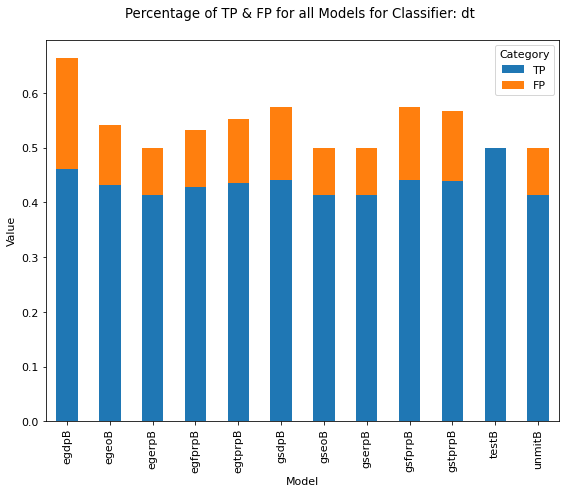

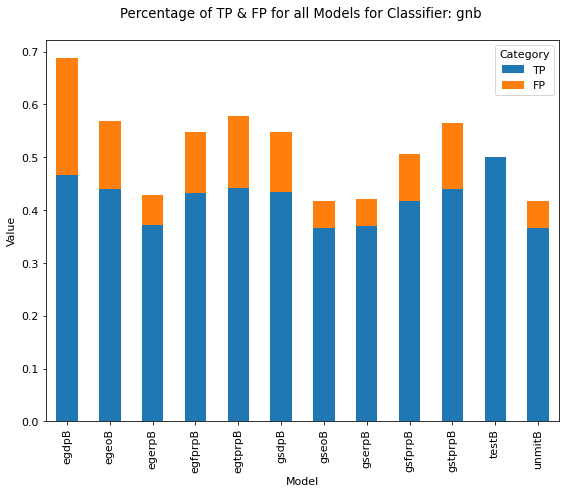

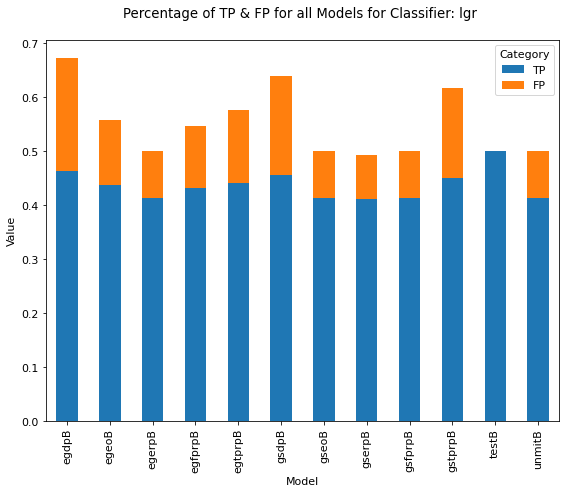

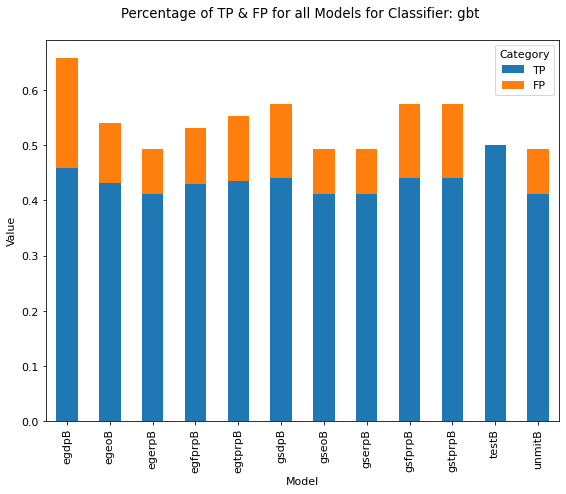

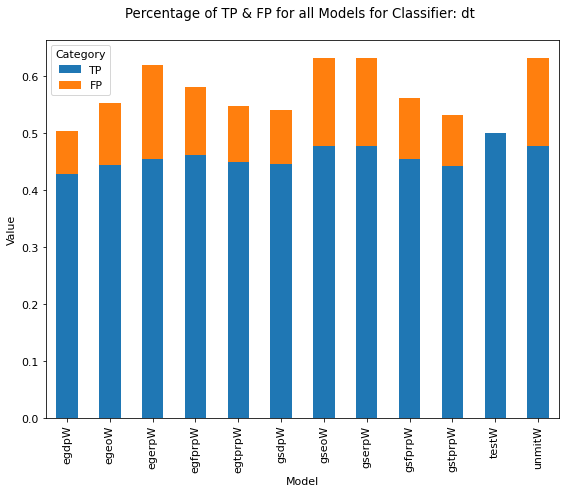

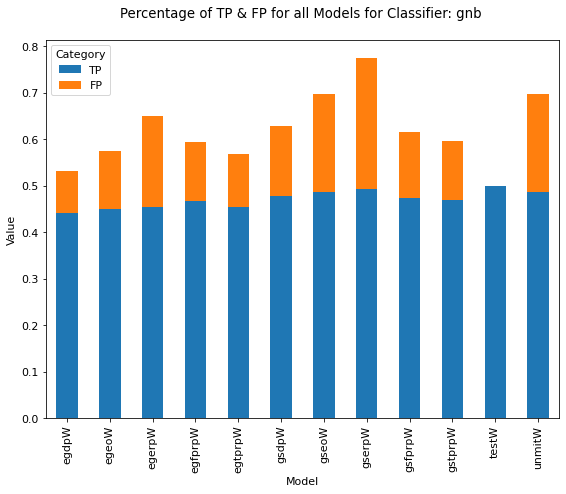

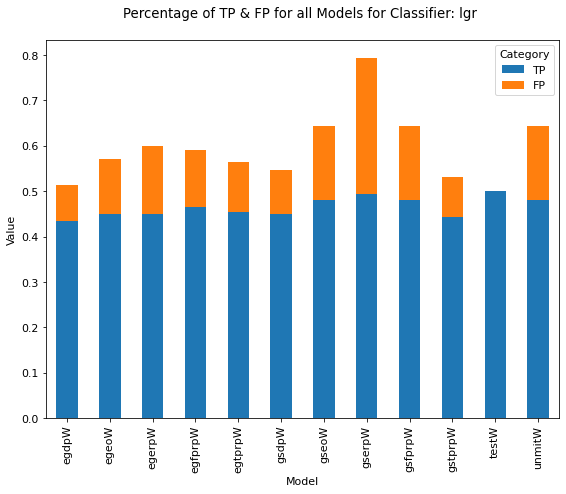

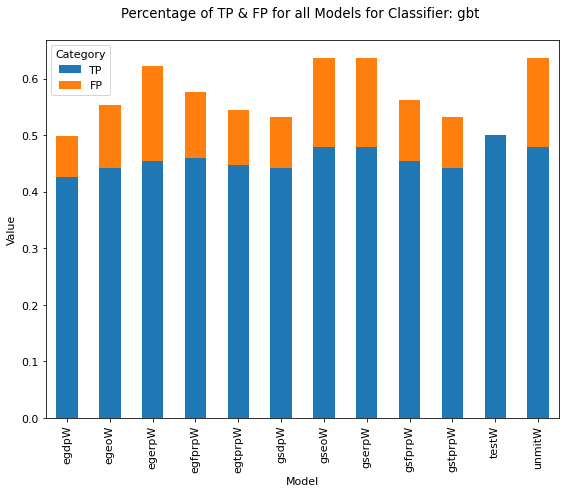

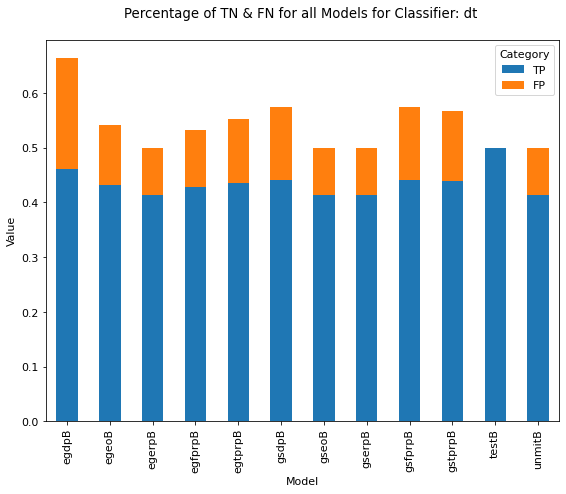

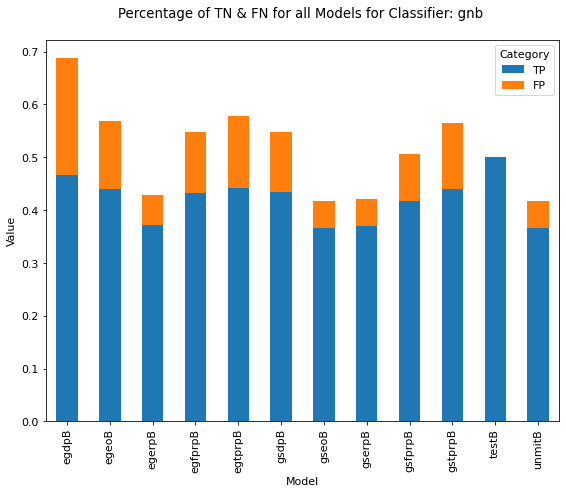

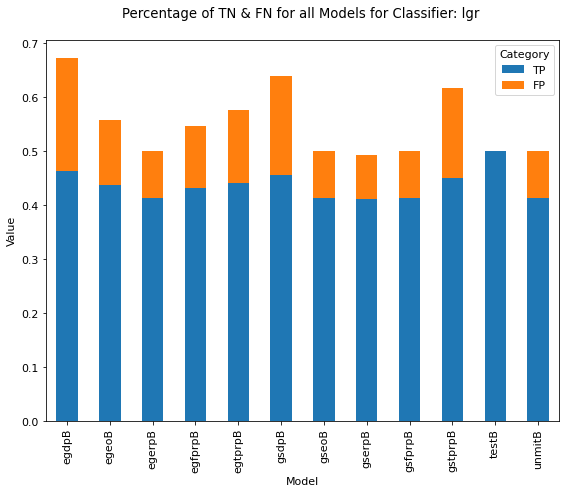

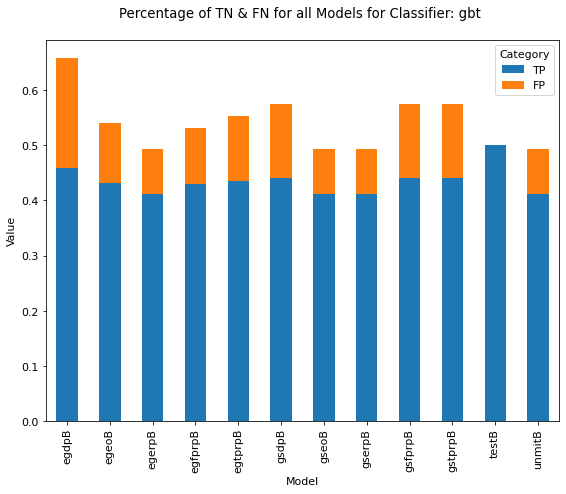

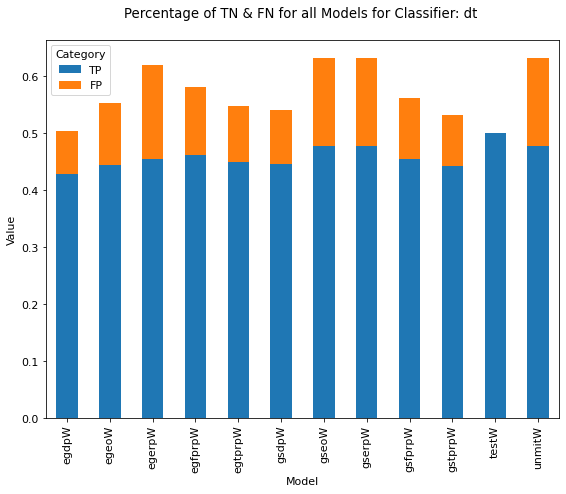

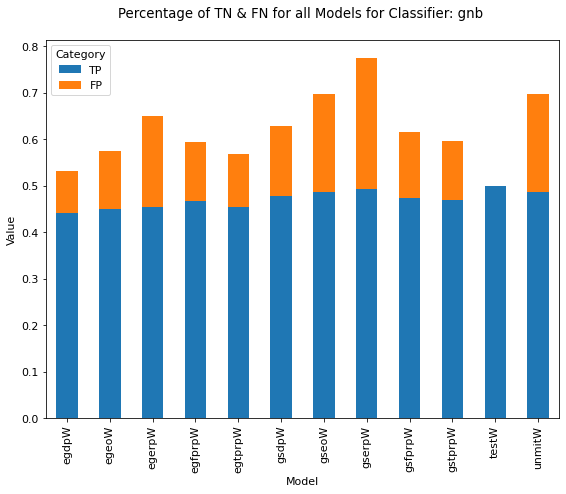

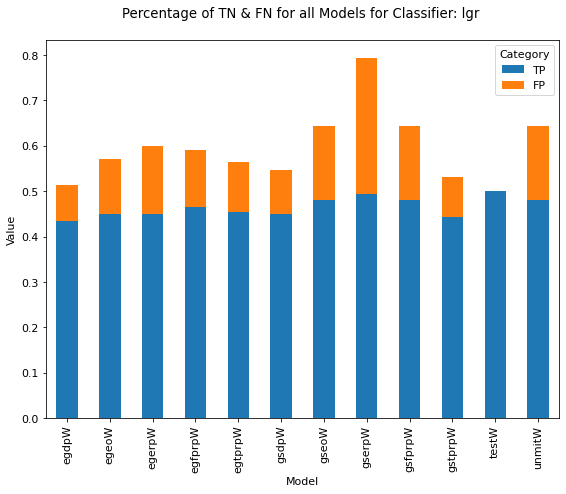

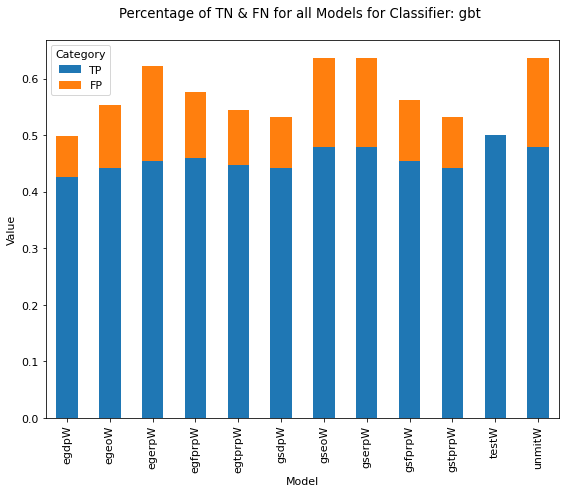

In [195]:
visualize_tpfp([dfs_b,dfs_w])
visualize_tnfn([dfs_b,dfs_w])

## 4. MWU p-Test results

In [196]:
# table 

In [200]:
def heatplot(path, df):
    sns.heatmap(df)
    plt.savefig(f'{path}plot_un_vs_mit_sig.png')

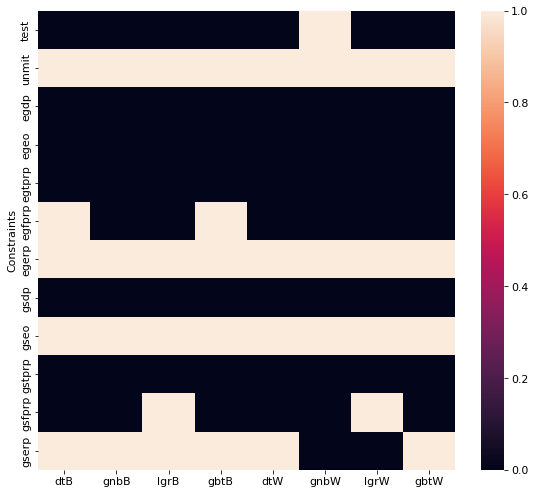

In [203]:
path_b = f'{data_path}mwu/p_un_vs_miti_B.csv'
df_b = pd.read_csv(path_b)
df_b = df_b.set_index('Constraints')
df_b[df_b >= 0.05] = 1
df_b[df_b < 0.05] = 0
path_w = f'{data_path}mwu/p_un_vs_miti_W.csv'
df_w = pd.read_csv(path_w)
df_w = df_w.set_index('Constraints')
df_w[df_w >= 0.05] = 1
df_w[df_w < 0.05] = 0
df = pd.concat([df_b,df_w], axis= 1)
heatplot(data_path,df)

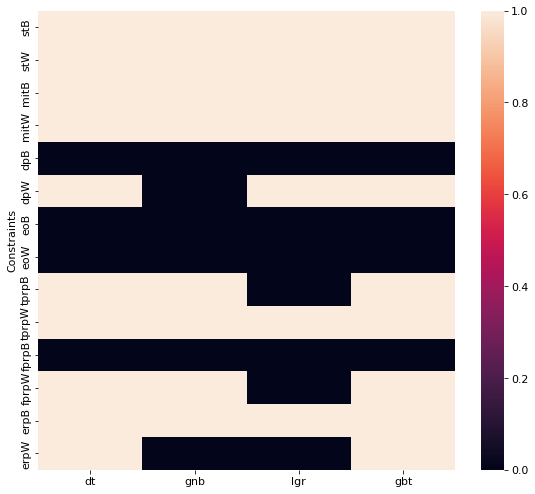

In [199]:
path = f'{data_path}mwu/p_eg_gs.csv'
df = pd.read_csv(path)
df = df.set_index('Constraints')
df[df >= 0.05] = 1
df[df < 0.05] = 0

heatplot(df)